In [ ]:
#Business Problem:
    #1. The market research team at AeroFit wants to identify the characteristics of the target audience 
       #for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
    #2. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product 
       #by developing appropriate tables and charts.
    #3. For each AeroFit treadmill product, construct two-way contingency tables and 
       #compute all conditional and marginal probabilities along with their insights/impact on the business.


In [526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm


In [527]:
df = pd.read_csv('Aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [528]:
#describes numerical data and provides a statistical summary  
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [529]:
#describes categorical data
data.describe(include="object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [530]:
#provides structural summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [531]:
#checks for null values for each column and returns the sum
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [532]:
#Product distribution
df_product = df['Product'].value_counts()
df_product

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [91]:
#Gender distribution
df_gender = df['Gender'].value_counts()
df_gender

Gender
Male      104
Female     76
Name: count, dtype: int64

In [41]:
#Counts based on marital status
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [46]:
#Counts based on fitness rating 
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [56]:
#Counts based on treadmill used per week
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [533]:
#segregated income into different income buckets 
df_cp = df
df_cp['Income_levels'] = df_cp['Income']
df_cp["Income_levels"] = pd.cut(df_cp["Income_levels"], bins =[25000,40000,60000,80000,120000], include_lowest=True, labels=["Low(25k-40k)","Medium(41k-60k)","High(61k-80k)","Very_High(81k-120k)"])
df_cp["Income_levels"] =df_cp["Income_levels"].astype("object")
df_cp.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_levels
0,KP281,18,Male,14,Single,3,4,29562,112,Low(25k-40k)
1,KP281,19,Male,15,Single,2,3,31836,75,Low(25k-40k)
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low(25k-40k)
3,KP281,19,Male,12,Single,3,3,32973,85,Low(25k-40k)
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low(25k-40k)


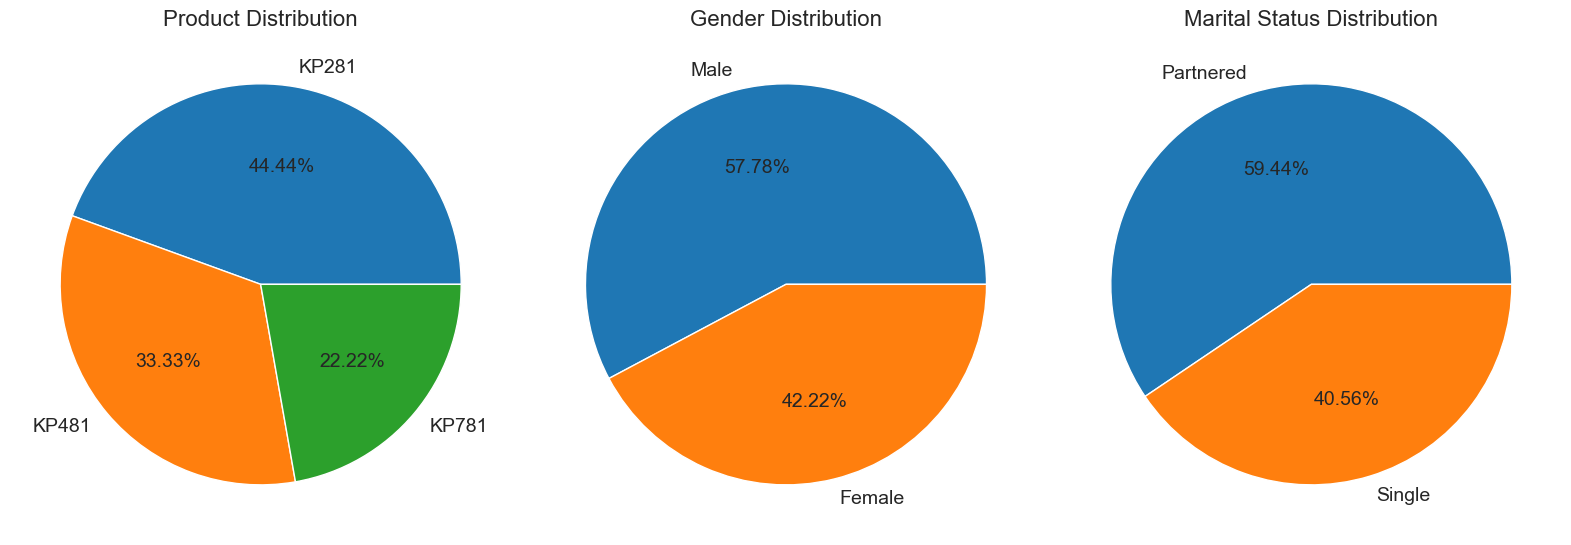

In [602]:
# Distribution of categorical variables using pie chart

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))
axs[0].pie(df['Product'].value_counts(),labels=['KP281','KP481','KP781'] ,autopct='%1.2f%%',textprops={'fontsize': 14})
axs[0].set_title('Product Distribution',fontsize=16)
axs[1].pie(df['Gender'].value_counts(), labels=['Male','Female'] ,autopct='%1.2f%%',textprops={'fontsize': 14})
axs[1].set_title('Gender Distribution',fontsize=16)
axs[2].pie(df['MaritalStatus'].value_counts(), labels=['Partnered','Single'],autopct='%1.2f%%',textprops={'fontsize': 14})
axs[2].set_title('Marital Status Distribution',fontsize=16)
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Income level Distribution')

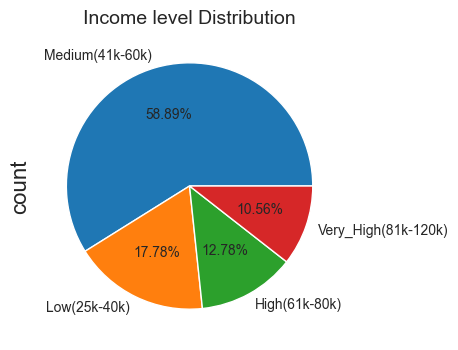

In [620]:
plt.figure(figsize=(4,4))
df['Income_levels'].value_counts().plot(kind='pie',autopct='%1.2f%%',textprops={'fontsize': 10})
plt.title('Income level Distribution',fontsize=14)

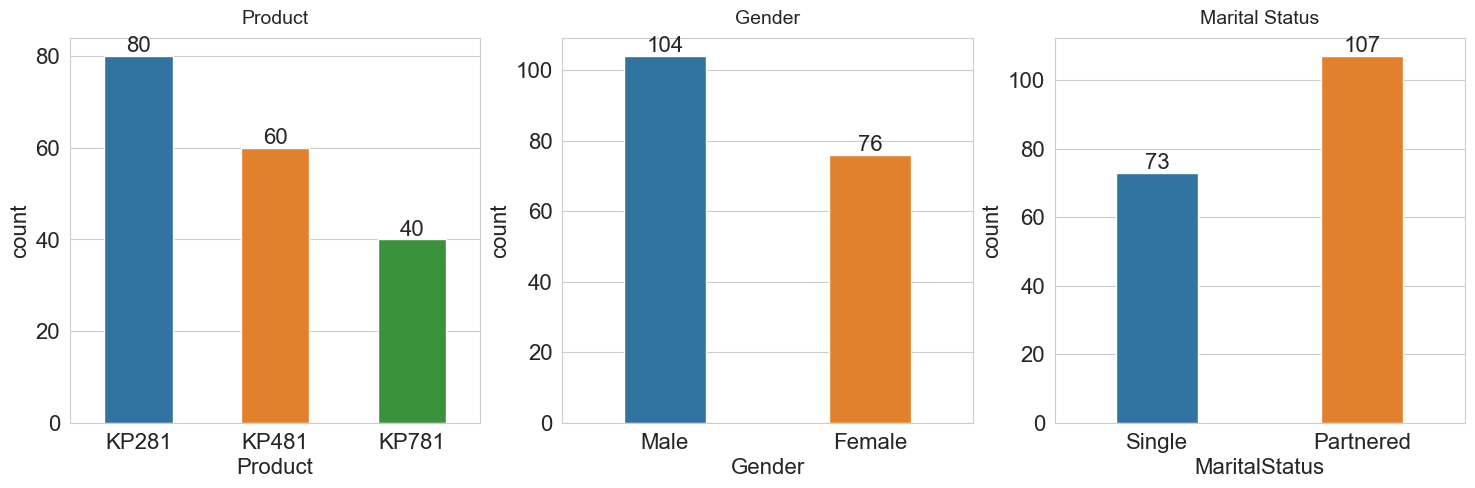

In [601]:
#count of products based on the type of threadmill,count of products based on the gender,
#count of products based on their marital status 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
ax1=sns.countplot(data=df, x='Product',width=0.5, ax=axs[0])
ax2=sns.countplot(data=df, x='Gender',width=0.4, ax=axs[1])
ax3=sns.countplot(data=df, x='MaritalStatus',width=0.4, ax=axs[2])
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax1.set_title("Product", pad=10, fontsize=14)
ax2.set_title("Gender", pad=10, fontsize=14)
ax3.set_title("Marital Status", pad=10, fontsize=14)
plt.show()

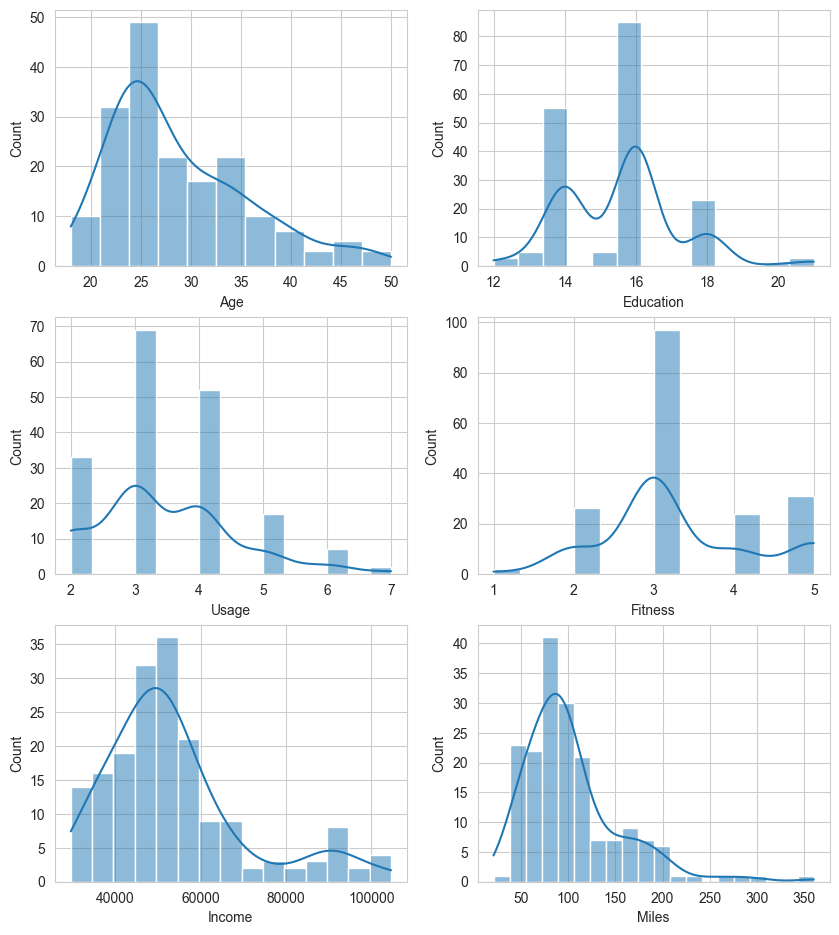

In [376]:
#frequency distribution of a continious numerical variables is obtained through histplot
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

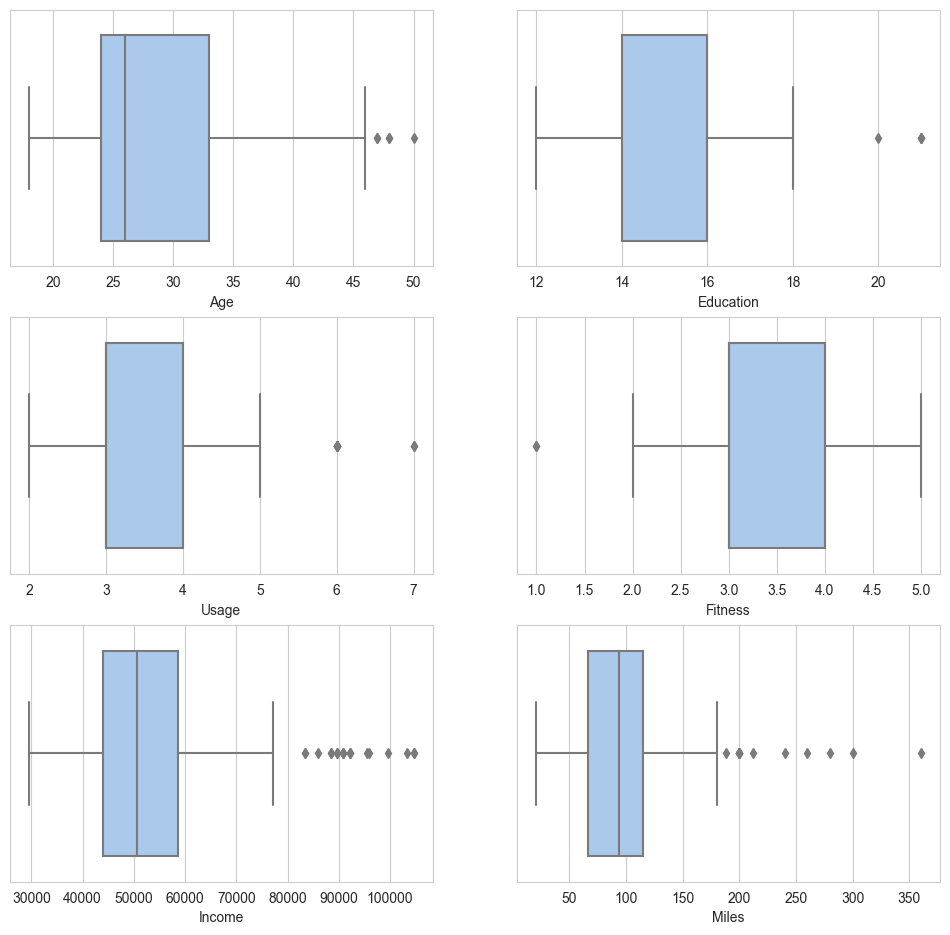

In [372]:
# To identify the outliers for each category of the data using boxplot

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", ax=axis[0,0],palette='pastel')
sns.boxplot(data=df, x="Education", ax=axis[0,1],palette='pastel')
sns.boxplot(data=df, x="Usage", ax=axis[1,0],palette='pastel')
sns.boxplot(data=df, x="Fitness", ax=axis[1,1],palette='pastel')
sns.boxplot(data=df, x="Income", ax=axis[2,0],palette='pastel')
sns.boxplot(data=df, x="Miles", ax=axis[2,1],palette='pastel')
plt.show()

In [307]:
#Calculating IQR,25% Quarttile,75% Quartile for Miles category
IQR = np.percentile(df["Miles"],75) - np.percentile(df["Miles"],25)
Q3 = np.percentile(df["Miles"],75)
Q1 = np.percentile(df["Miles"],25)
UpperWhisker_miles = Q3 + (1.5*(IQR))

In [603]:
IQR,Q3,Q1,UpperWhisker_miles

(48.75, 114.75, 66.0, 187.875)

In [309]:
#To check how many values lie outside the outlier for miles category
outlier_data_miles = data[data["Miles"]>UpperWhisker_miles]
outlier_data_miles.shape[0]

13

In [606]:
#Calculating IQR, 25% Quarttile,75% Quartile for Income category
IQR_income = np.percentile(df["Income"],75) - np.percentile(df["Income"],25)
q3 = np.percentile(df["Income"],75)
q1 = np.percentile(df["Income"],25)
UpperWhisker_income = q3 + (1.5*(IQR_income))

In [605]:
IQR_income,q3,q1,UpperWhisker_income

(14609.25, 58668.0, 44058.75, 80581.875)

In [312]:
#To check how many values lie outside the outlier for income category
outlier_data_income = data[data["Income"]>UpperWhisker_income]
outlier_data_income.shape[0]

19

In [509]:
df.describe().round(3)

,Age,Education,Usage,Fitness,Income,Miles
count,180.000,180.000,180.000,180.000,180.000,180.000
mean,28.789,15.572,3.456,3.311,53719.578,103.194
std,6.943,1.617,1.085,0.959,16506.684,51.864
min,18.000,12.000,2.000,1.000,29562.000,21.000
25%,24.000,14.000,3.000,3.000,44058.750,66.000
50%,26.000,16.000,3.000,3.000,50596.500,94.000
75%,33.000,16.000,4.000,4.000,58668.000,114.750
max,50.000,21.000,7.000,5.000,104581.000,360.000


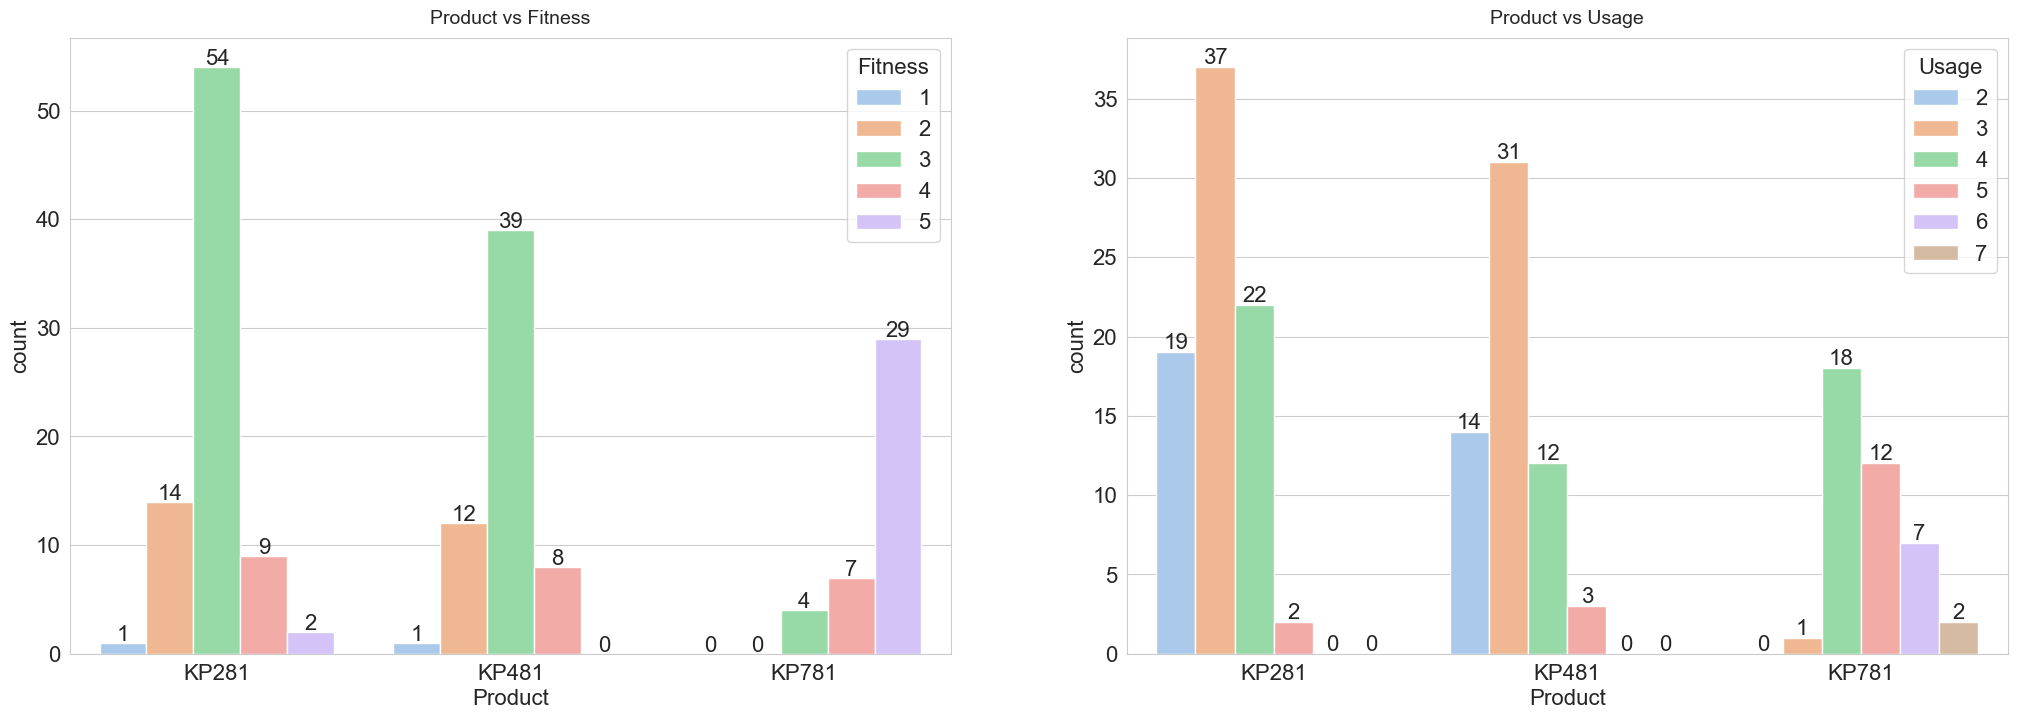

In [558]:
#Compares count of different product types against diferent types of Gender and Marital status 
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
axs1 = sns.countplot(data=df, x='Product', hue='Fitness', width=0.8 , palette='pastel', ax=axs[0])
axs2 = sns.countplot(data=df, x='Product', hue='Usage', width=0.8, palette='pastel', ax=axs[1])
axs[0].set_title("Product vs Fitness", pad=10, fontsize=14)
axs[1].set_title("Product vs Usage", pad=10, fontsize=14)

num_bars = len(axs1.patches)
# Add value on top of each bar
for p in axs1.patches:
    height = p.get_height()
    axs1.text(p.get_x() + p.get_width() / 2., height + 0.2, str(round(height)), ha="center")

# Add value on top of each bar
for p in axs2.patches:
    height = p.get_height()
    axs2.text(p.get_x() + p.get_width() / 2., height + 0.2, str(round(height)), ha="center")
    
    
plt.show()

[Text(0, 0, '33'), Text(0, 0, '7')]

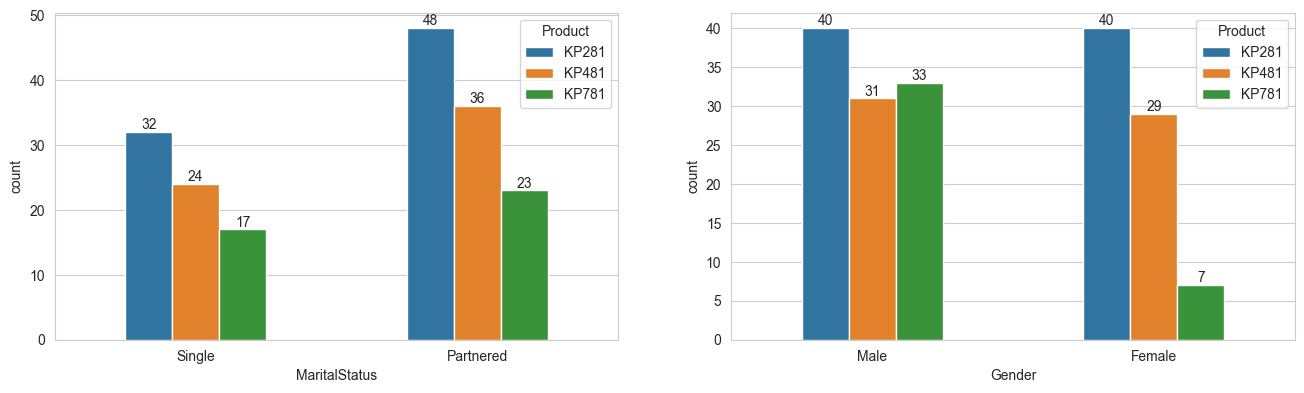

In [463]:
#Compares count of different product types against diferent types of Gender and Marital status 

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 3))
fig.subplots_adjust(top=1.2)
ax1=sns.countplot(x='MaritalStatus', hue='Product',width=0.5, data=df,ax=axis[0])
ax2=sns.countplot(x='Gender', hue='Product', width=0.5, data=df,ax=axis[1])                        
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
ax1.bar_label(ax1.containers[2])
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax2.bar_label(ax2.containers[2])

Text(0.5, 1.0, 'Product vs Income_levels')

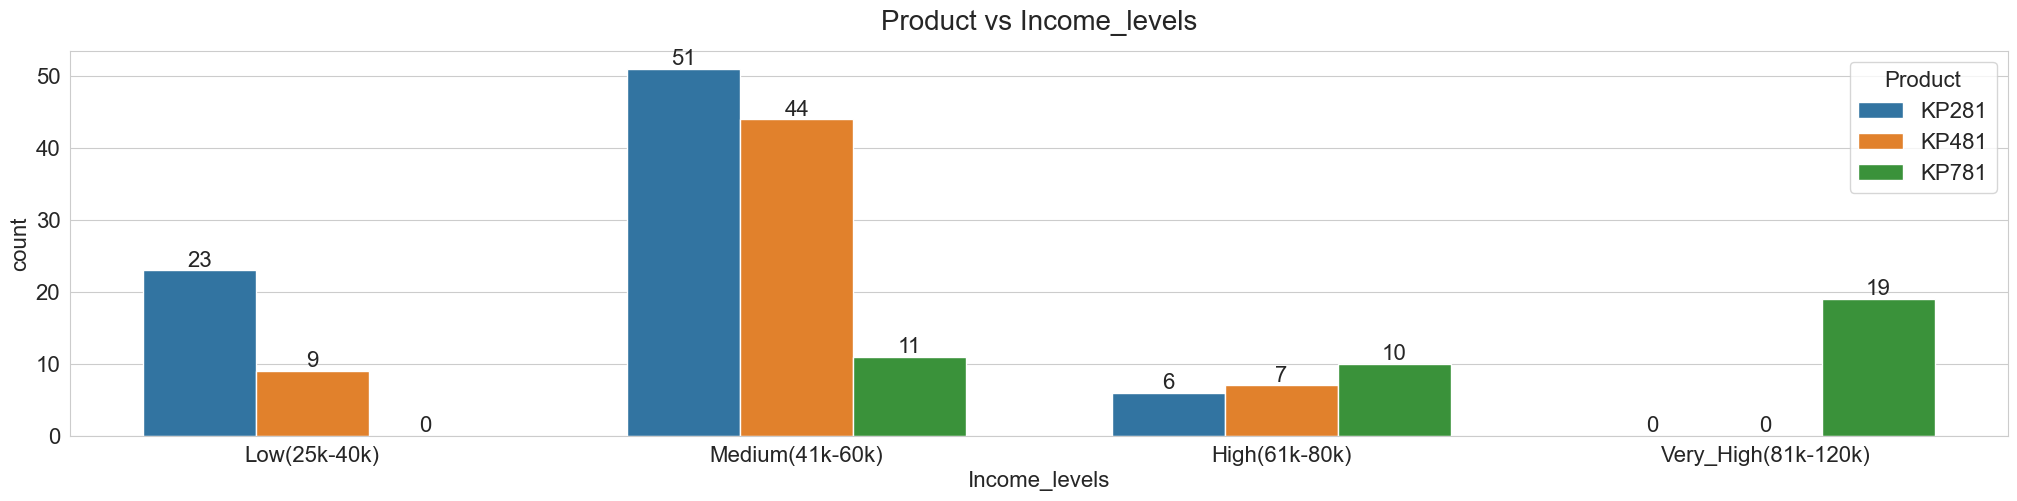

In [612]:
#count of product across different income levels
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(25, 5))
ax = sns.countplot(x='Income_levels', hue='Product', width=0.7, data=df_cp)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.set_title('Product vs Income_levels',pad =15, fontsize=20)

Text(0.5, 1.0, 'Product vs Age')

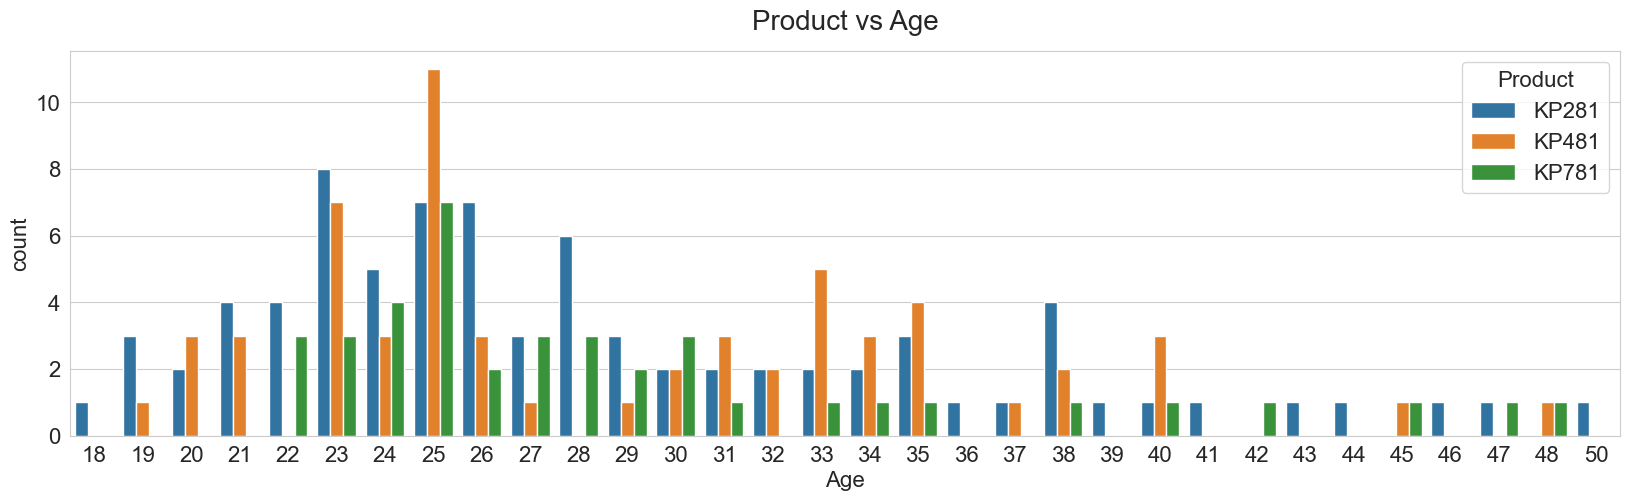

In [615]:
#count of product across different age
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Age', hue='Product', data=df)
ax.set_title('Product vs Age',pad =15, fontsize=20)

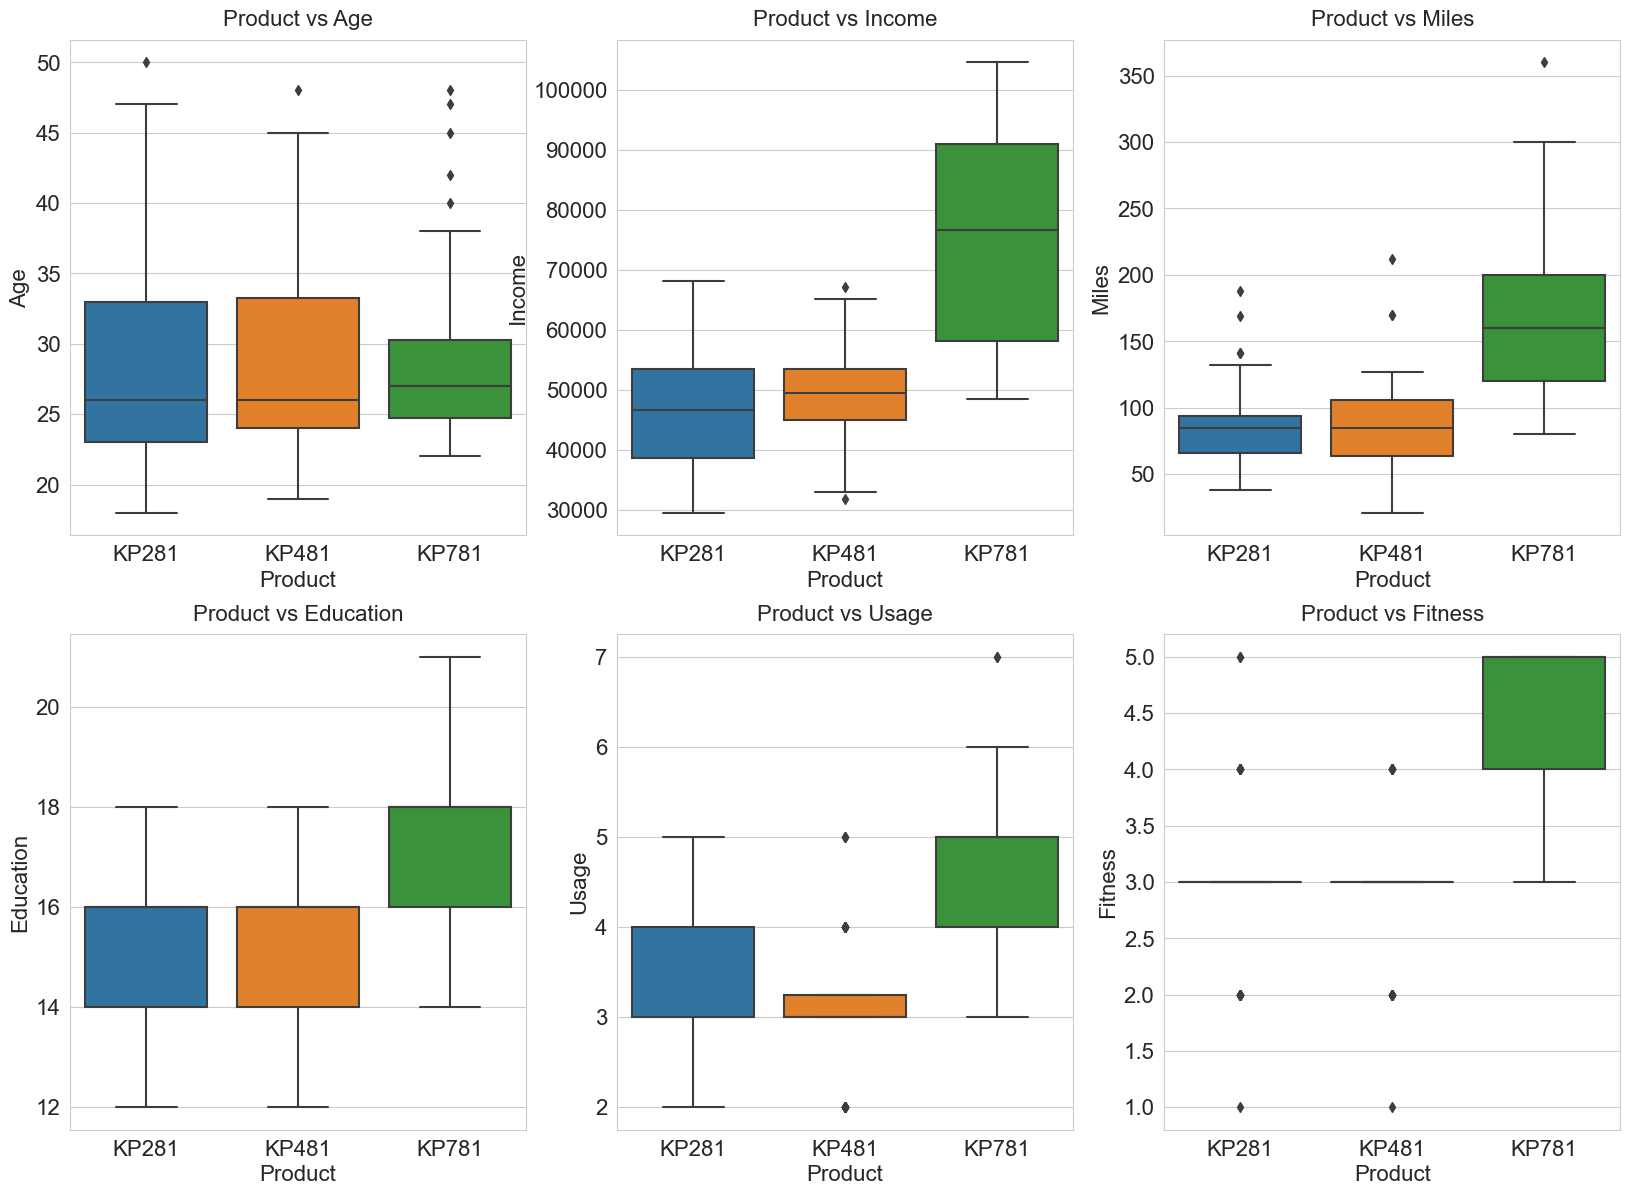

In [573]:
#Check if these data have any correaltion with the product type

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.subplots_adjust(top=1.2)
sns.boxplot(x='Product', y='Age', data=df, ax=axis[0,0])
sns.boxplot(x='Product', y='Income', data=df, ax=axis[0,1])
sns.boxplot(x='Product', y='Miles', data=df, ax=axis[0,2])
sns.boxplot(x='Product', y='Education', data=df, ax=axis[1,0])
sns.boxplot(x='Product', y='Usage', data=df, ax=axis[1,1])
sns.boxplot(x='Product', y='Fitness', data=df, ax=axis[1,2])
axis[0,0].set_title("Product vs Age", pad=10, fontsize=16)
axis[0,1].set_title("Product vs Income", pad=10, fontsize=16)
axis[0,2].set_title("Product vs Miles", pad=10, fontsize=16)
axis[1,0].set_title("Product vs Education", pad=10, fontsize=16)
axis[1,1].set_title("Product vs Usage", pad=10, fontsize=16)
axis[1,2].set_title("Product vs Fitness", pad=10, fontsize=16)
plt.show()

<Axes: >

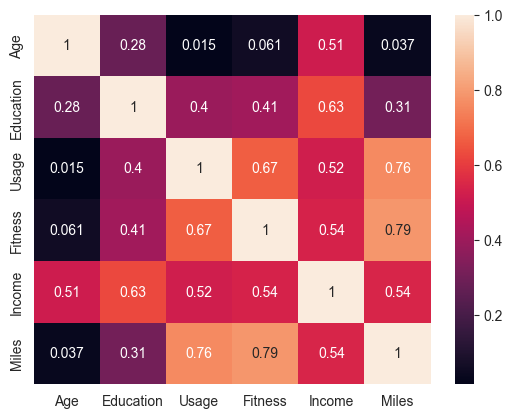

In [388]:
#Shows how data values are correlated with every other variable in the table
numeric_data = df.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(),annot=True)

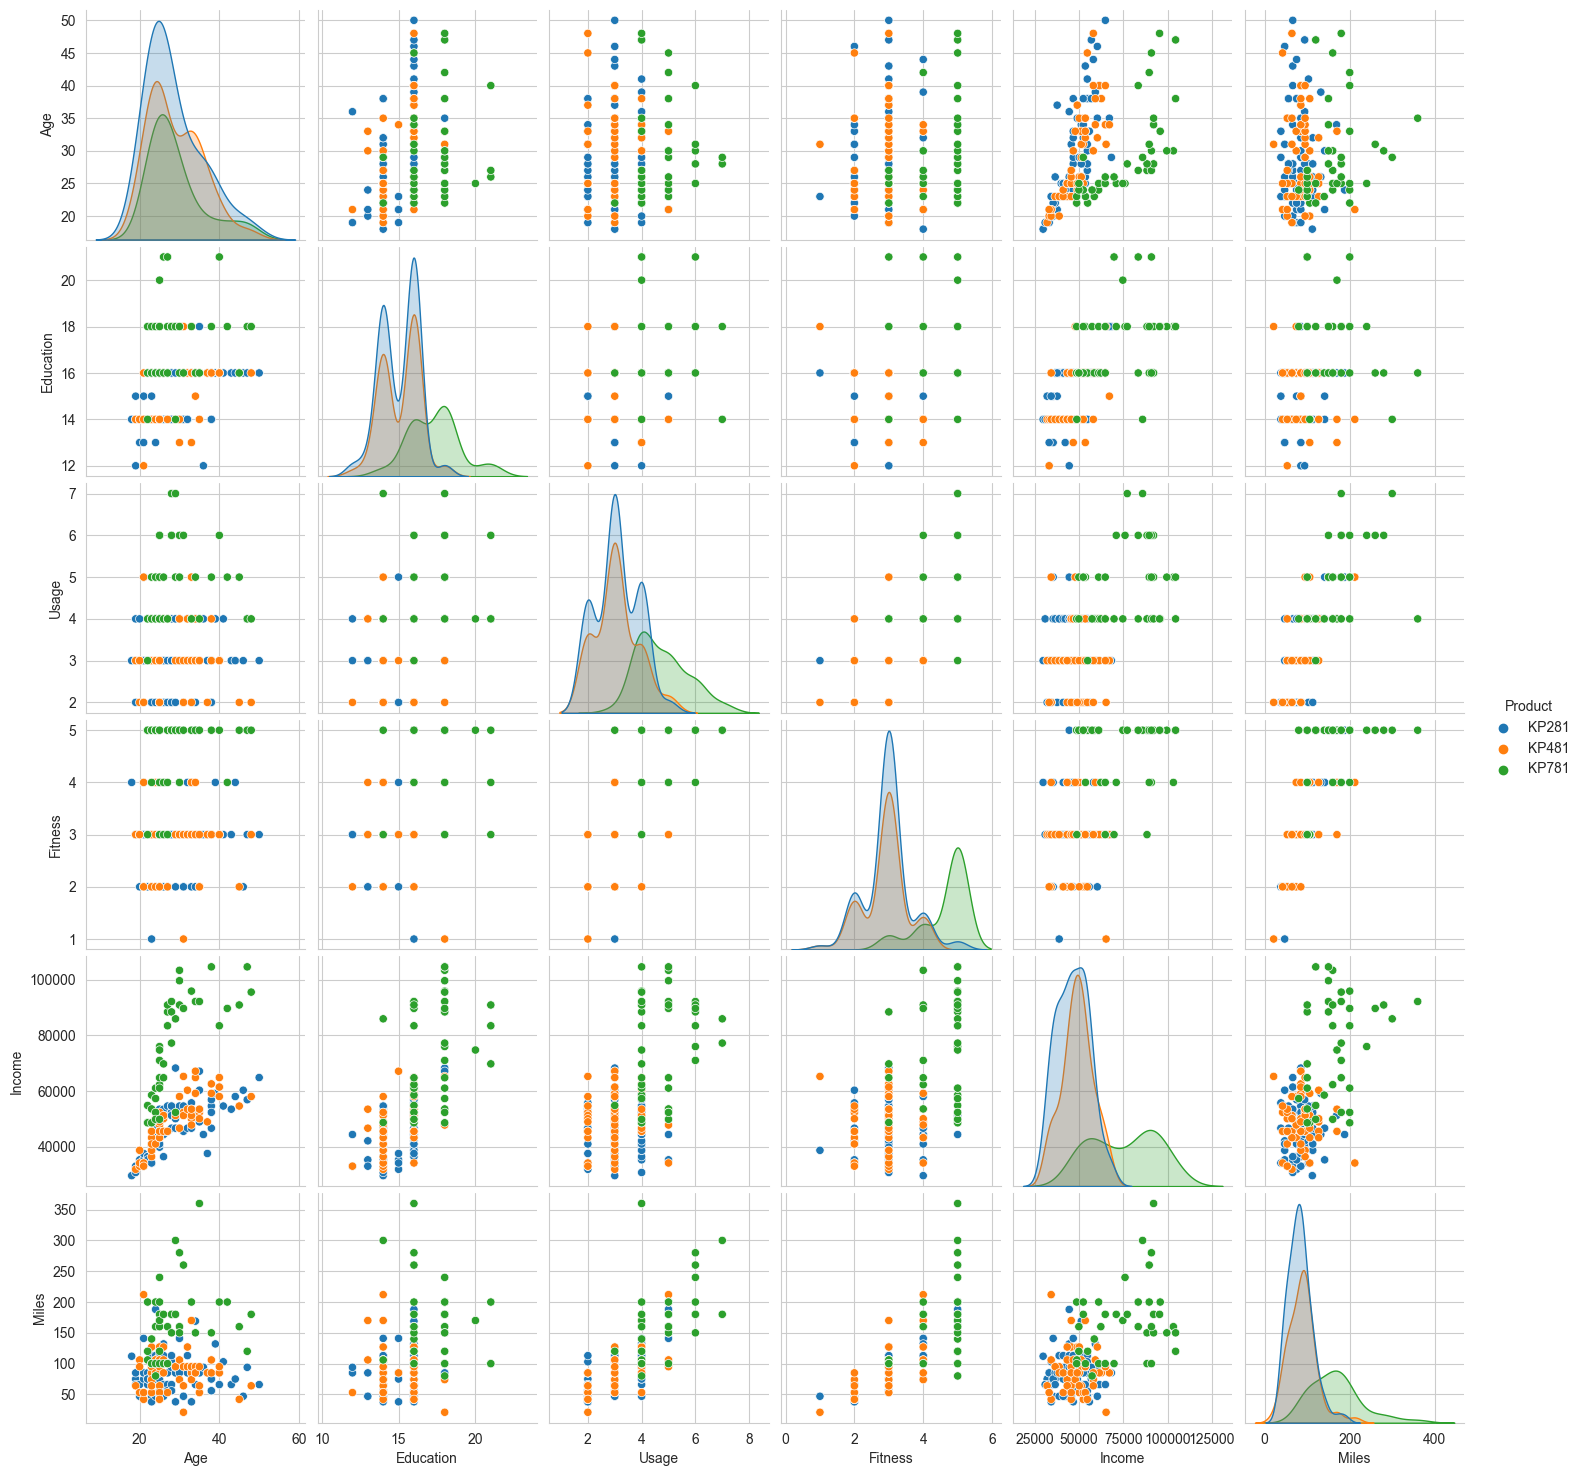

In [198]:
#creates number of scatter plots and histograms to visualize the relationships 
#between all numerical variables in a dataset
sns.pairplot(df, hue ='Product')

# Marginal and Conditional Probabilities

# Gender

In [567]:
#Marginal Probability of each product

df_margin =(df['Product'].value_counts()/df.shape[0] *100).round(2)
df_margin

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: count, dtype: float64

In [258]:
#Conditional Probability of each product given gender which will also normalize margin values 

pd.crosstab([df["Product"]],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [259]:
#Conditional Probability of each product given gender which normalize over all values

np.round(pd.crosstab(df['Product'],[df['Gender']], normalize=True, margins=True, margins_name='Total')*100,2)

Gender,Female,Male,Total
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
Total,42.22,57.78,100.00


In [260]:
#Conditional Probability of each product given gender which is normalized over each column

np.round(pd.crosstab(df['Product'],[df['Gender']], normalize='columns', margins=True, margins_name='Total')*100,2)

Gender,Female,Male,Total
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


# Fitness

In [206]:
#Conditional Probability of each product given Fitness which also normalize margin values

pd.crosstab([df["Product"]],df["Fitness"],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [250]:
#Conditional Probability of each product given Fitness which normalize over all values

np.round(pd.crosstab(df['Product'],[df['Fitness']], normalize=True, margins=True, margins_name='Total')*100,2)

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
Total,1.11,14.44,53.89,13.33,17.22,100.00


In [266]:
#Conditional Probability of each product given Fitness which is normalized over each column

np.round(pd.crosstab(df['Product'],[df['Fitness']], normalize='columns', margins=True, margins_name='Total')*100,2)

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,50.0,53.85,55.67,37.50,6.45,44.44
KP481,50.0,46.15,40.21,33.33,0.00,33.33
KP781,0.0,0.00,4.12,29.17,93.55,22.22


# MaritalStatus

In [209]:
#Conditional Probability of each product given MaritalStatus which will normalize margin values

pd.crosstab([df["Product"]],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [252]:
#Conditional Probability of each product given MaritalStatus which will normalize all values

np.round(pd.crosstab(df['Product'],[df['MaritalStatus']], normalize=True, margins=True, margins_name='Total')*100,2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,26.67,17.78,44.44
KP481,20.00,13.33,33.33
KP781,12.78,9.44,22.22
Total,59.44,40.56,100.00


In [268]:
#Conditional Probability of each product given MaritalStatus which will normalize over each column

np.round(pd.crosstab(df['Product'],[df['MaritalStatus']], normalize='columns', margins=True, margins_name='Total')*100,2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


# Usage

In [271]:
#Conditional Probability of each product given Usage which will normalize margin values

pd.crosstab(df['Product'],[df['Usage']], margins=True, margins_name='Total')

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
Total,33,69,52,17,7,2,180


In [272]:
#Conditional Probability of each product given Usage which will normalize all values

np.round(pd.crosstab(df['Product'],[df['Usage']], normalize=True, margins=True, margins_name='Total')*100,2)

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
Total,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [273]:
#Conditional Probability of each product given Usage which will normalize over each column

np.round(pd.crosstab(df['Product'],[df['Usage']], normalize='columns', margins=True, margins_name='Total')*100,2)

Usage,2,3,4,5,6,7,Total
Product,,,,,,,
KP281,57.58,53.62,42.31,11.76,0.0,0.0,44.44
KP481,42.42,44.93,23.08,17.65,0.0,0.0,33.33
KP781,0.00,1.45,34.62,70.59,100.0,100.0,22.22


# Income_levels

In [539]:
#Conditional Probability of each product given Income_levels which will normalize margin values

pd.crosstab(df['Product'],[df['Income_levels']], margins=True, margins_name='Total')

Income_levels,High(61k-80k),Low(25k-40k),Medium(41k-60k),Very_High(81k-120k),Total
Product,,,,,
KP281,6,23,51,0,80
KP481,7,9,44,0,60
KP781,10,0,11,19,40
Total,23,32,106,19,180


In [540]:
#Conditional Probability of each product given Income_levels which will normalize all values

np.round(pd.crosstab(df['Product'],[df['Income_levels']], normalize=True, margins=True, margins_name='Total')*100,2)

Income_levels,High(61k-80k),Low(25k-40k),Medium(41k-60k),Very_High(81k-120k),Total
Product,,,,,
KP281,3.33,12.78,28.33,0.00,44.44
KP481,3.89,5.00,24.44,0.00,33.33
KP781,5.56,0.00,6.11,10.56,22.22
Total,12.78,17.78,58.89,10.56,100.00


In [541]:
#Conditional Probability of each product given Income_levels which will normalize over each column

np.round(pd.crosstab(df['Product'],[df['Income_levels']], normalize='columns', margins=True, margins_name='Total')*100,2)

Income_levels,High(61k-80k),Low(25k-40k),Medium(41k-60k),Very_High(81k-120k),Total
Product,,,,,
KP281,26.09,71.88,48.11,0.0,44.44
KP481,30.43,28.12,41.51,0.0,33.33
KP781,43.48,0.00,10.38,100.0,22.22
